## Notebook 2: Pre-Analysis Visuals

**Goal**: Explore the cleaned marketing campaign dataset to draw initial insights about what factors may influence customer conversion.

**Key Questions Explored**:
- What is the overall conversion rate?
- How does conversion vary by demographics?
- Which engagement behaviors lead to conversions?
- What marketing channels perform best?
- Are there threshold effects?
- What are the most correlated predictors?

Each section below contains code and visuals to answer these questions, followed by brief interpretations.

### Loading in the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MISY331/digital_marketing_campaign_dataset_cleaned.csv")
df.shape

(7851, 18)

In [4]:
df['Conversion'].value_counts()

,count
Conversion,
1,6893
0,958


In [5]:
sns.pairplot(df, hue='Conversion')

Error in callback <function flush_figures at 0x7ff092790ae0> (for post_execute):


KeyboardInterrupt: 

### What is the overall conversion rate?

,count
Conversion,
1,6893
0,958


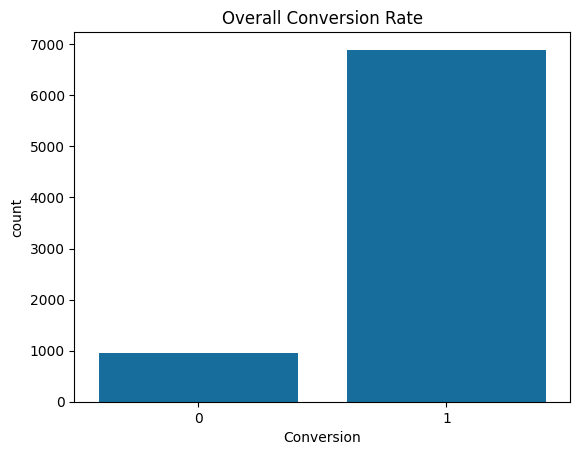

In [16]:
sns.countplot(x='Conversion', data=df)
plt.title('Overall Conversion Rate')
df['Conversion'].value_counts()

### How do demographics affect conversion?

age vs conversion

<Axes: xlabel='Conversion', ylabel='Age'>

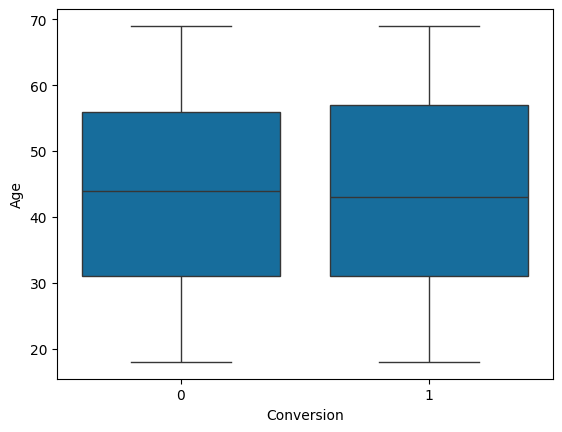

In [17]:
sns.boxplot(x='Conversion', y='Age', data=df)

gender vs conversion

<Axes: xlabel='Conversion', ylabel='count'>

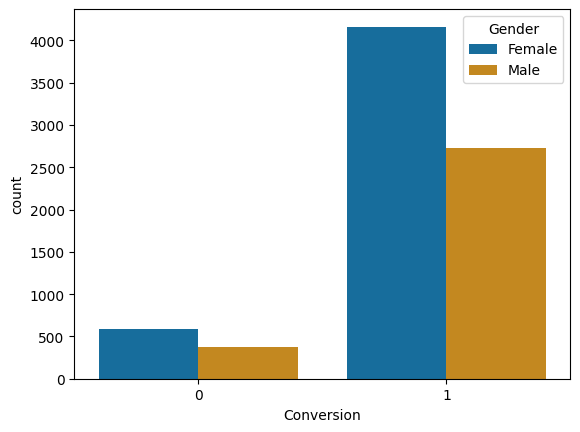

In [18]:
sns.countplot(data=df, x='Conversion', hue="Gender")#, dodge=False)

income vs conversion

<Axes: xlabel='Conversion', ylabel='Income'>

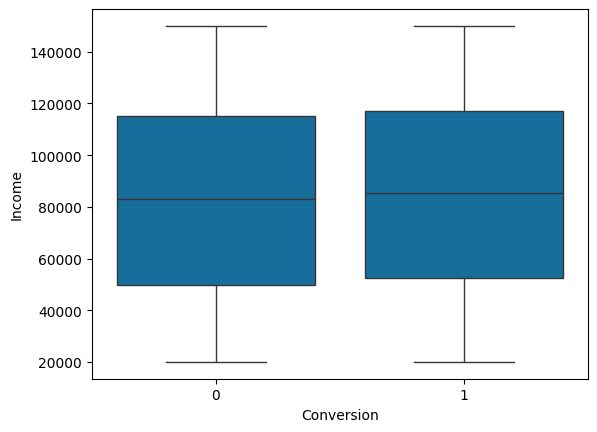

In [19]:
sns.boxplot(x='Conversion', y='Income', data=df)

 ### Which marketing channels/campaigns are most effective?
 Understand where successful customers are coming from.

<Axes: xlabel='Conversion', ylabel='count'>

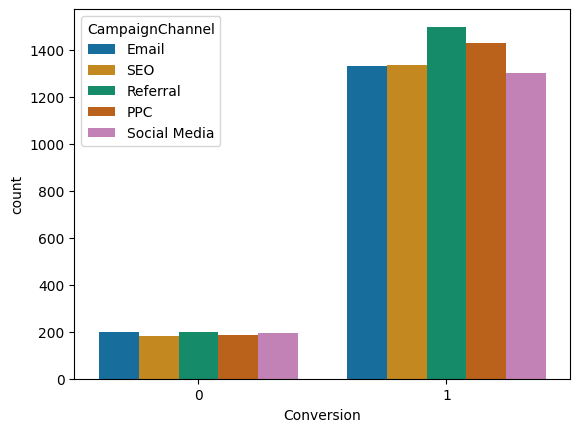

In [20]:
sns.countplot(x='Conversion', hue='CampaignChannel', orient="v", data=df, palette="colorblind")

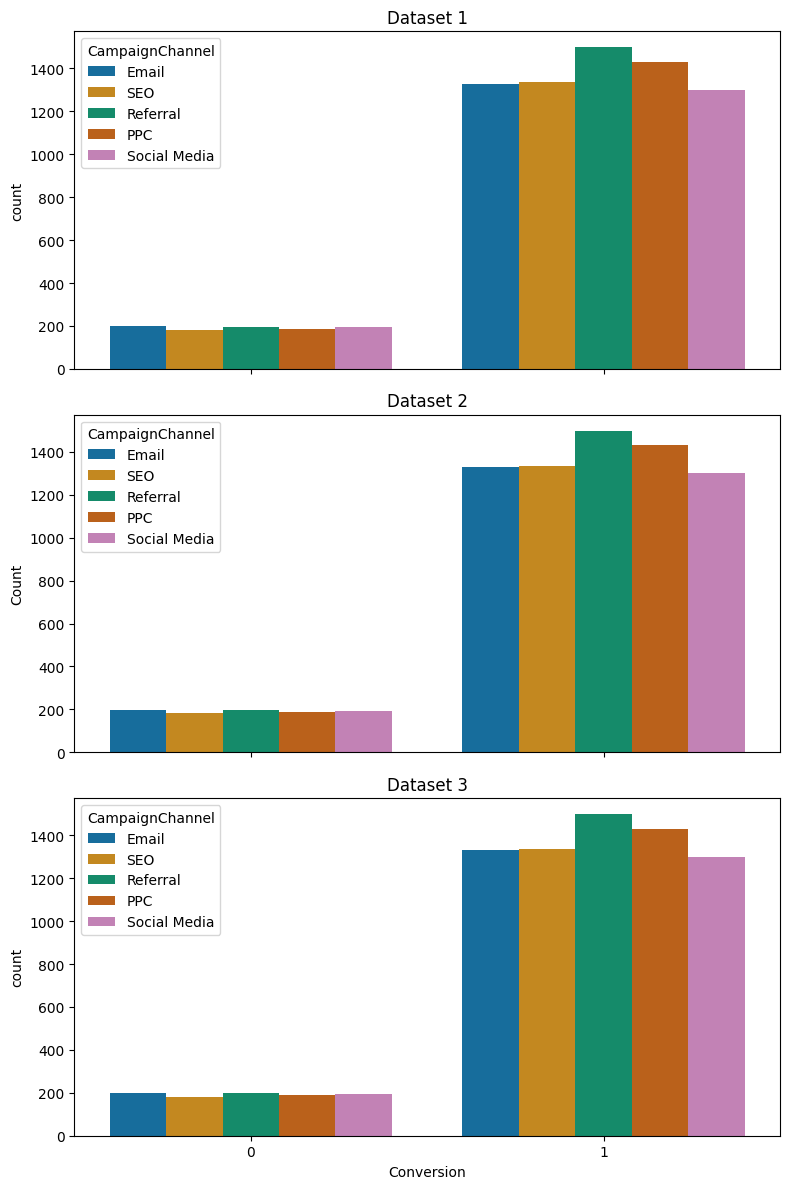

In [21]:
# prompt: make a 3x1 facet grid of the function sns.countplot(x='Conversion', hue='CampaignChannel', orient="v", data=df, palette="colorblind") but each grid pulls from a different data set with the same columns

# create dummy datasets (replace with your actual datasets)
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# create a 3x1 facet grid
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# plot on each subplot with different datasets
sns.countplot(x='Conversion', hue='CampaignChannel', orient="v", data=df1, palette="colorblind", ax=axes[0])
axes[0].set_title('Dataset 1')

sns.countplot(x='Conversion', hue='CampaignChannel', orient="v", data=df2, palette="colorblind", ax=axes[1])
axes[1].set_title('Dataset 2')
axes[1].set_ylabel('Count') # Add y-axis label to the middle plot

sns.countplot(x='Conversion', hue='CampaignChannel', orient="v", data=df3, palette="colorblind", ax=axes[2])
axes[2].set_title('Dataset 3')

# Adjust layout
plt.tight_layout()
plt.show()

### Do more engaged users convert more often?
Engagement metrics (Website Visits, Email Opens, Pages per Visit, Time on Site) may reveal user intent.

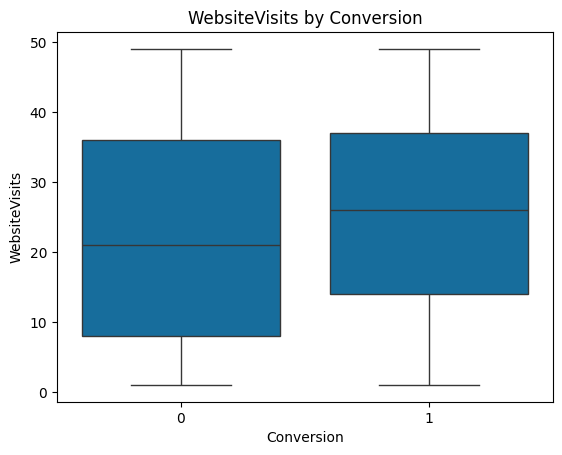

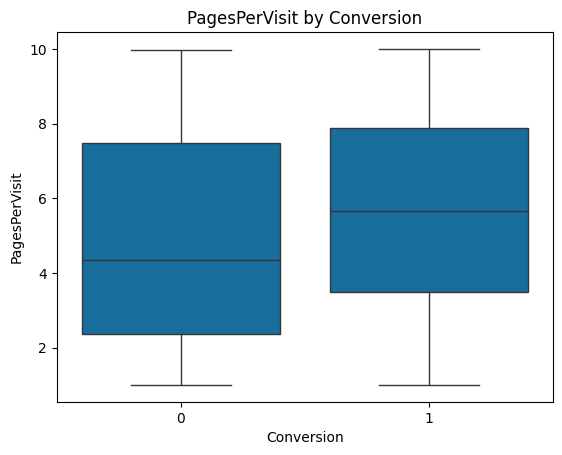

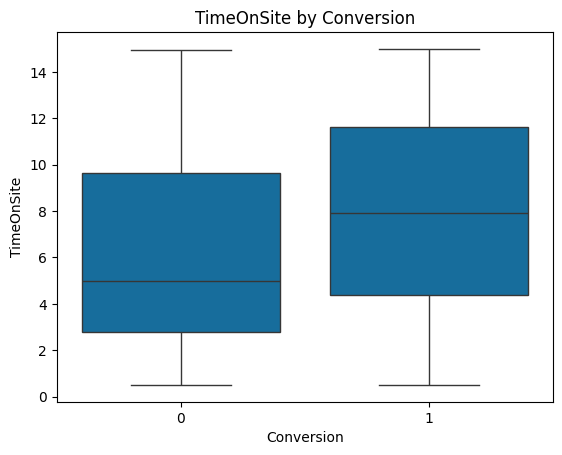

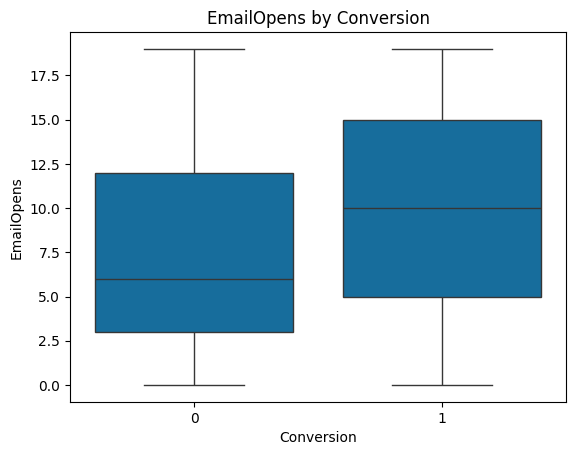

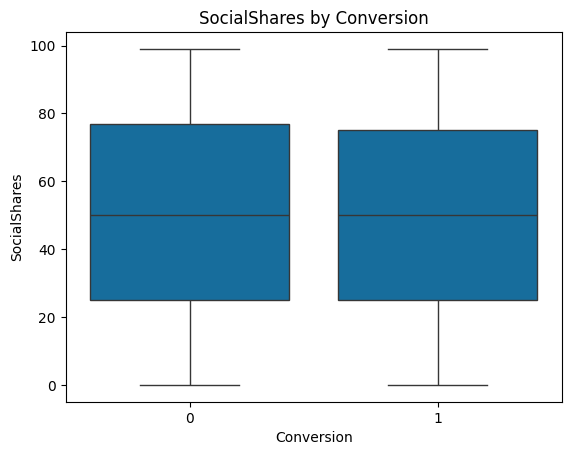

In [12]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
for col in metrics:
    sns.boxplot(x='Conversion', y=col, data=df)
    plt.title(f'{col} by Conversion')
    plt.show()

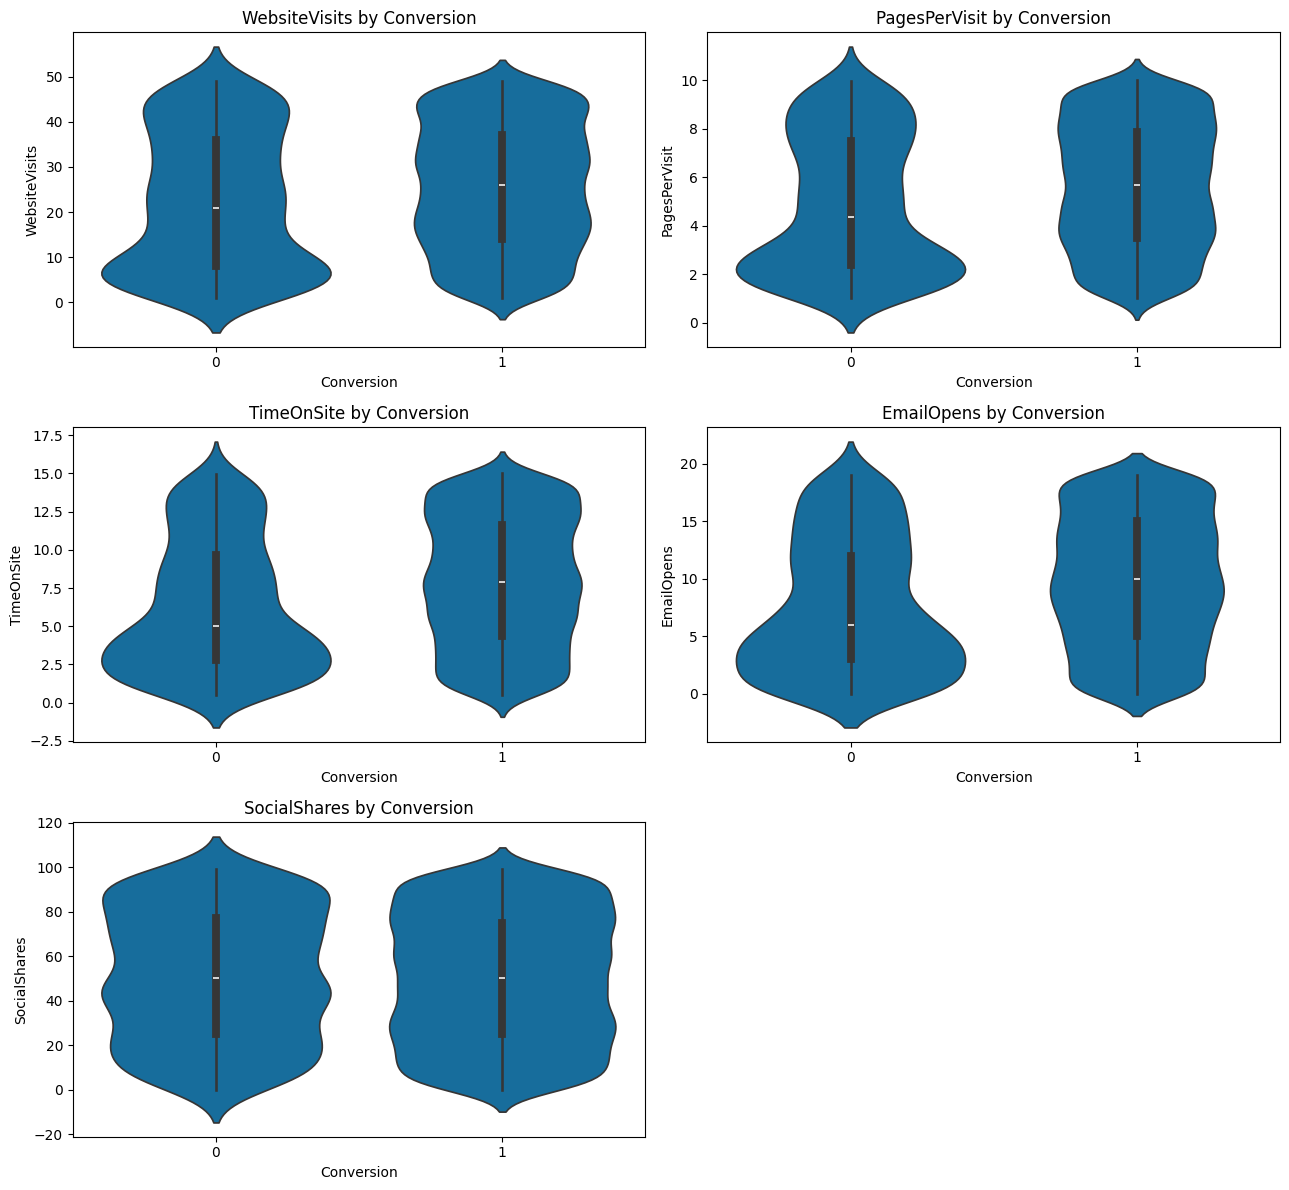

In [13]:
## Same as above but more viewable
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
num_metrics = len(metrics)
num_cols = 2  # Number of columns in the grid
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, num_rows * 4))  # Create grid of subplots

for i, col in enumerate(metrics):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]  # Get the current subplot
    sns.violinplot(x='Conversion', y=col, data=df, ax=ax)
    ax.set_title(f'{col} by Conversion')

# Hide any empty subplots
for i in range(num_metrics, num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

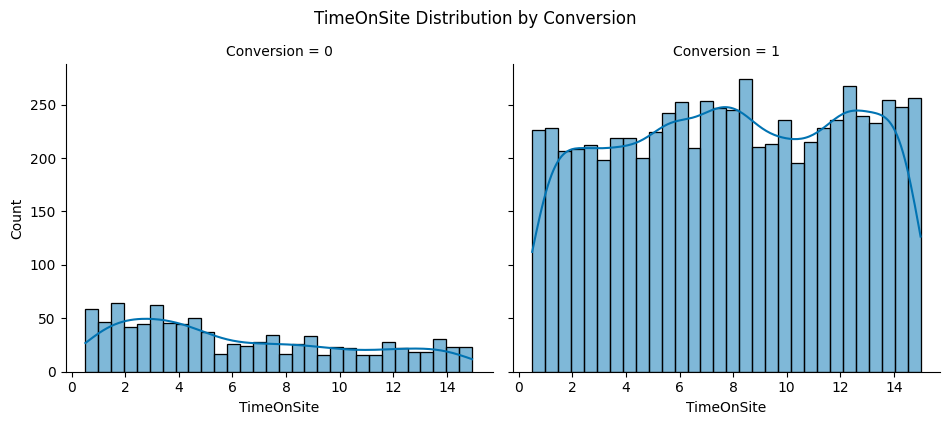

In [14]:
g = sns.FacetGrid(df, col='Conversion', height=4, aspect=1.2)
g.map(sns.histplot, 'TimeOnSite', bins=30, kde=True)
g.fig.suptitle("TimeOnSite Distribution by Conversion", y=1.05)
plt.show()

### Does higher ad spend lead to more conversions?

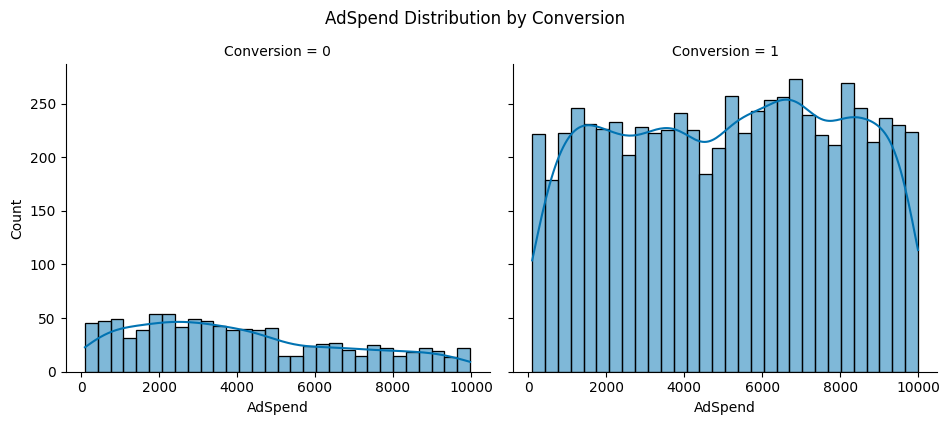

In [15]:
g = sns.FacetGrid(df, col='Conversion', height=4, aspect=1.2)
g.map(sns.histplot, 'AdSpend', bins=30, kde=True)
g.fig.suptitle("AdSpend Distribution by Conversion", y=1.05)
plt.show()

### What variables are most correlated with conversion?

<Axes: >

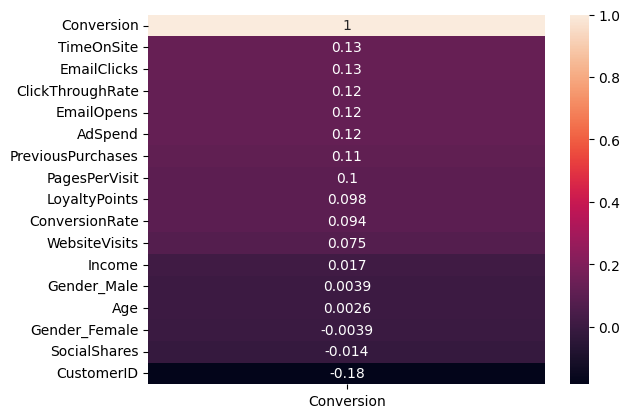

In [22]:
df2=pd.get_dummies(df, columns=['Gender'], drop_first=False)

corr = df2.corr(numeric_only=True)
sns.heatmap(corr[['Conversion']].sort_values(by='Conversion', ascending=False), annot=True)

#### Correlation Summary
The most important variables associated with customer conversion include:

- TimeOnSite, EmailClicks, ClickThroughRate, EmailOpens, AdSpend, and PreviousPurchases, each showing a positive relationship with conversion.

- PreviousPurchases and LoyaltyPoints also appear relevant, reflecting long-term engagement.

Demographic variables like Age and Income show little to no linear relationship with conversion in this dataset.

### Are there threshold effects?
Some features may only impact conversion after a cutoff (TimeOnSite > 10 min)

<Axes: xlabel='HighTimeOnSite', ylabel='count'>

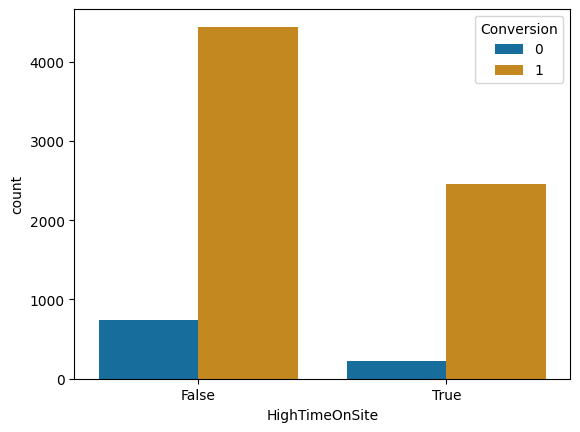

In [ ]:
df['HighTimeOnSite'] = df['TimeOnSite'] > 10
sns.countplot(x='HighTimeOnSite', hue='Conversion', data=df)

There appears to be a clear threshold effect with time spent on the site. Users who spend more than 10 minutes are significantly more likely to convert. This suggests that TimeOnSite is a key behavioral feature that could strongly influence our predictive models.

EmailClicks, ClickThroughRatem EmailOpens, PreviousPurchases, LoyaltyPoints vs. Conversion

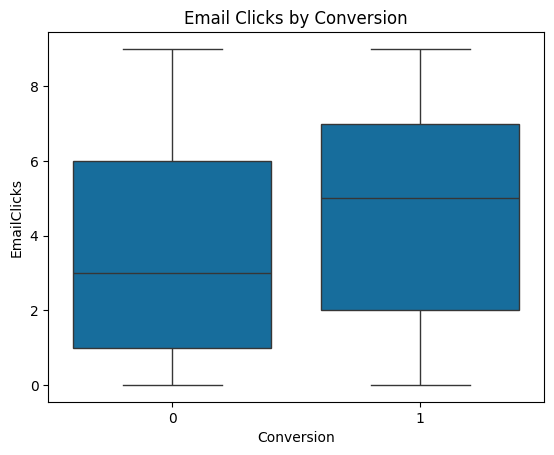

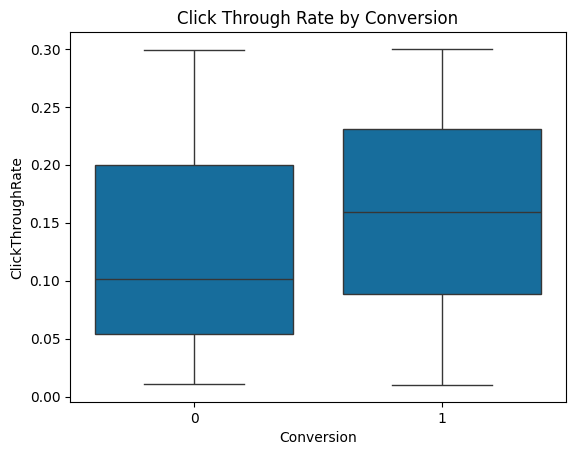

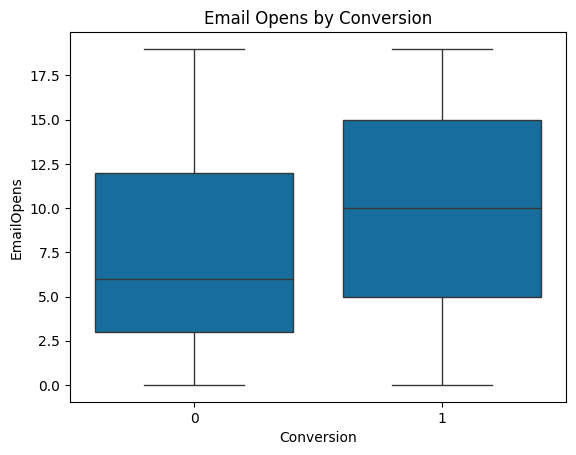

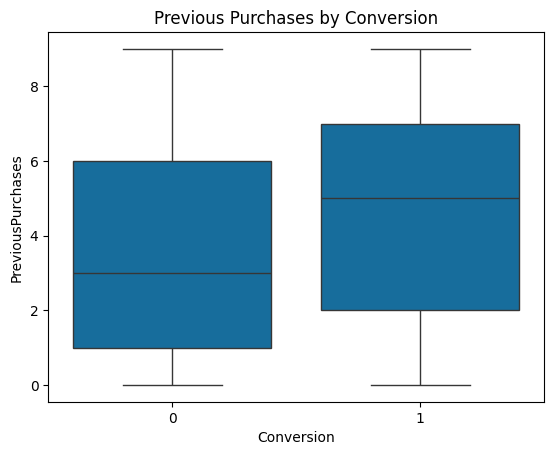

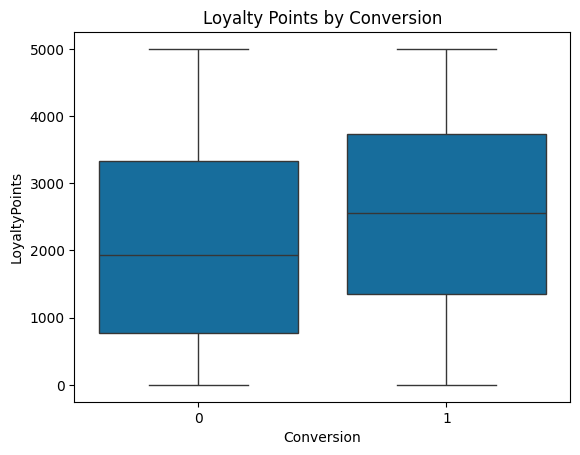

In [ ]:
sns.boxplot(x='Conversion', y='EmailClicks', data=df)
plt.title('Email Clicks by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='ClickThroughRate', data=df)
plt.title('Click Through Rate by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='EmailOpens', data=df)
plt.title('Email Opens by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='PreviousPurchases', data=df)
plt.title('Previous Purchases by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='LoyaltyPoints', data=df)
plt.title('Loyalty Points by Conversion')
plt.show()

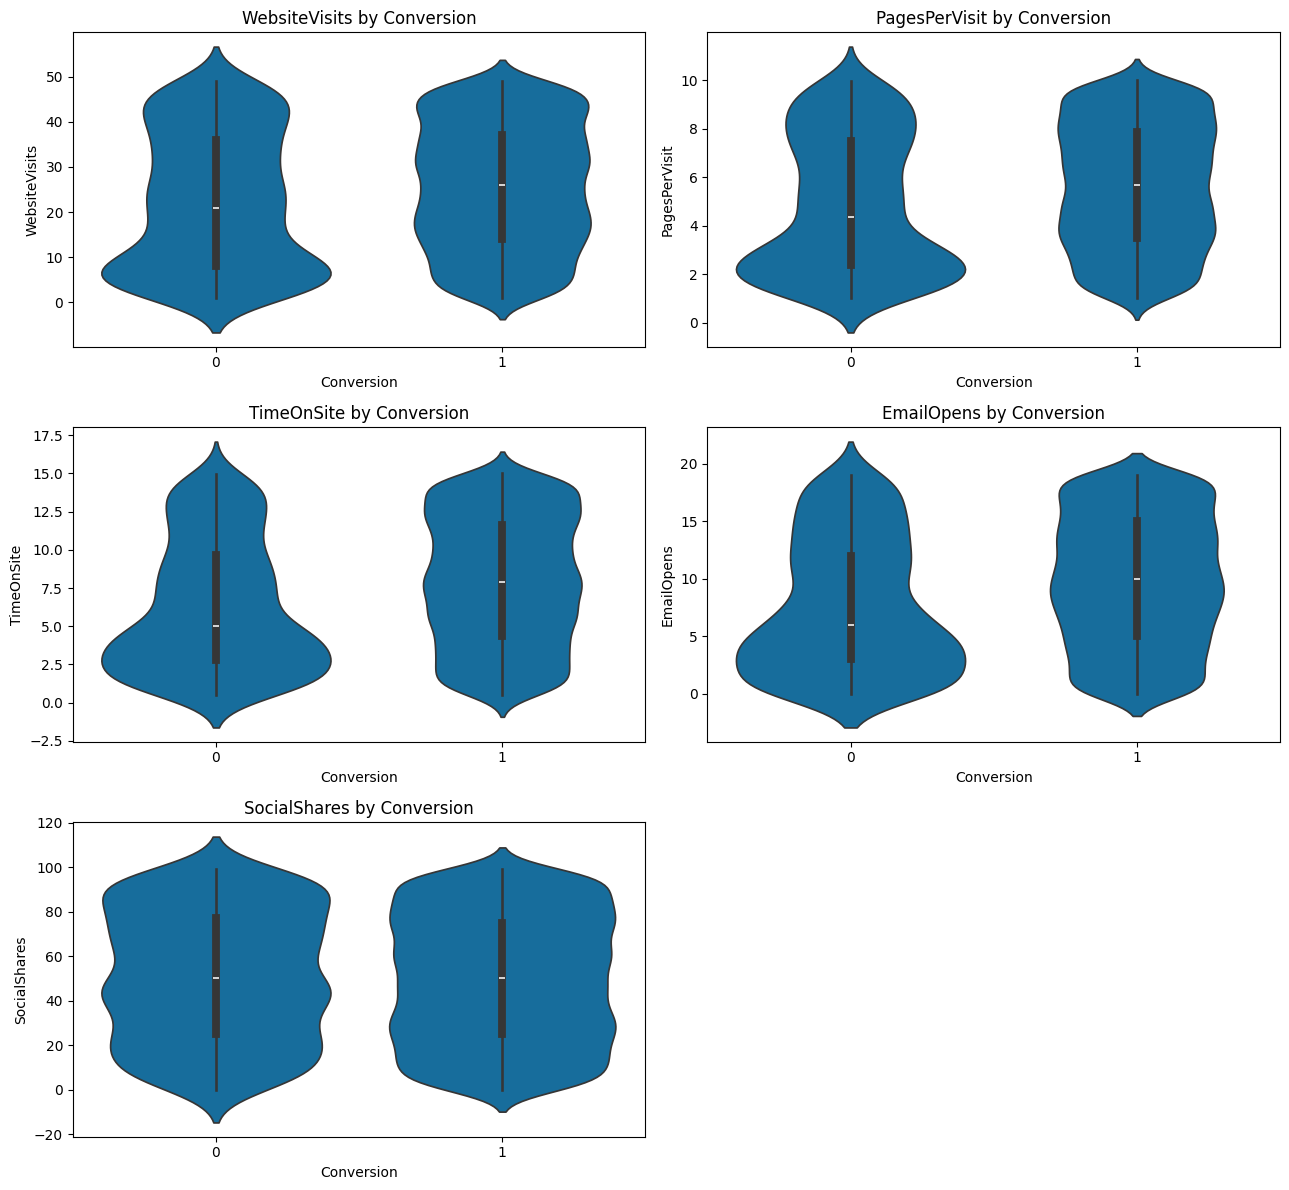

In [ ]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
num_metrics = len(metrics)
num_cols = 2  # Number of columns in the grid
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, num_rows * 4))  # Create grid of subplots

for i, col in enumerate(metrics):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]  # Get the current subplot
    sns.violinplot(x='Conversion', y=col, data=df, ax=ax)
    ax.set_title(f'{col} by Conversion')

# Hide any empty subplots
for i in range(num_metrics, num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

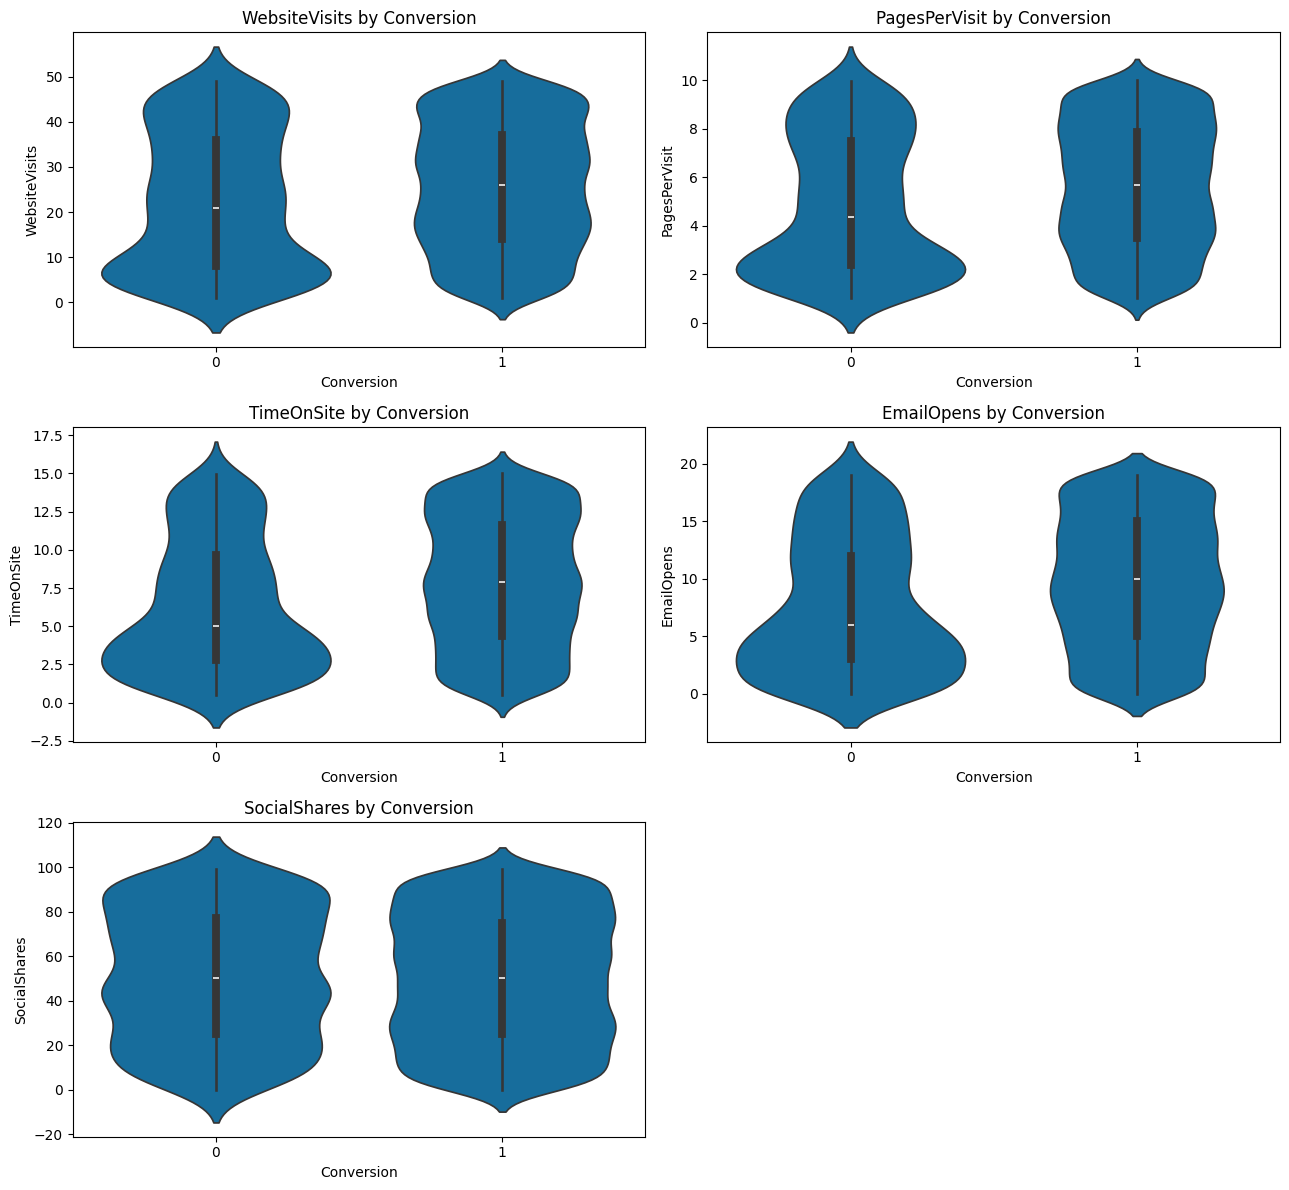

In [ ]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
num_metrics = len(metrics)
num_cols = 2  # Number of columns in the grid
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, num_rows * 4))  # Create grid of subplots

for i, col in enumerate(metrics):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]  # Get the current subplot
    sns.violinplot(x='Conversion', y=col, data=df, ax=ax)
    ax.set_title(f'{col} by Conversion')

# Hide any empty subplots
for i in range(num_metrics, num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
"""for col in metrics:
    sns.kdeplot(df[df['Conversion'] == 0][col], label='Not Converted', fill=True)
    sns.kdeplot(df[df['Conversion'] == 1][col], label='Converted', fill=True)
    plt.title(f'{col} Distribution by Conversion')
    plt.legend()
    plt.show()"""

"for col in metrics:\n    sns.kdeplot(df[df['Conversion'] == 0][col], label='Not Converted', fill=True)\n    sns.kdeplot(df[df['Conversion'] == 1][col], label='Converted', fill=True)\n    plt.title(f'{col} Distribution by Conversion')\n    plt.legend()\n    plt.show()"

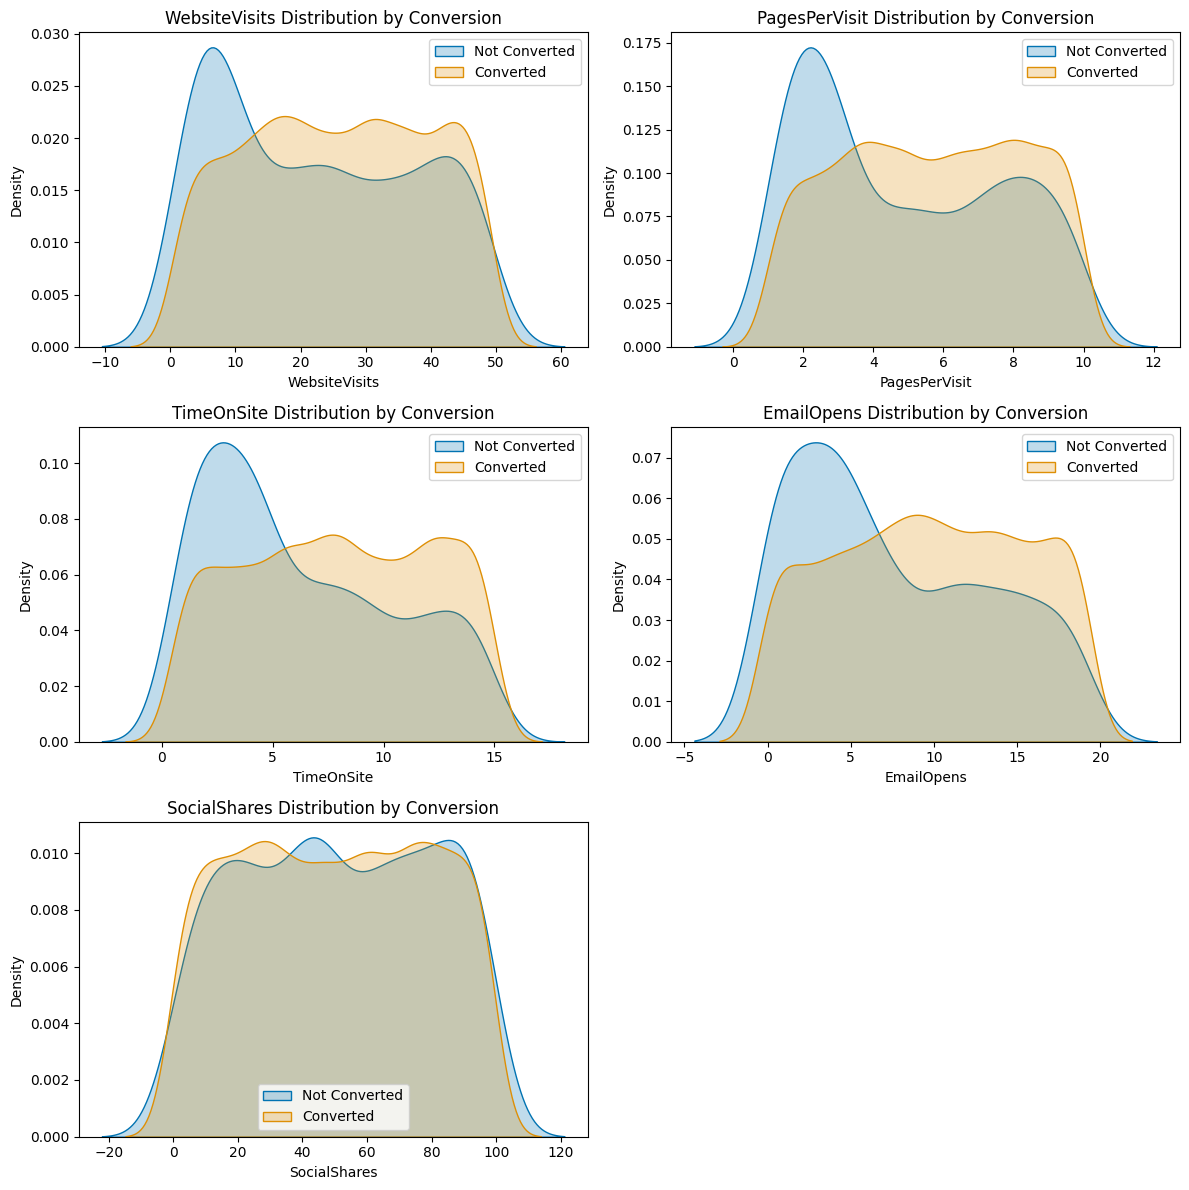

In [ ]:
num_metrics = len(metrics)
num_cols = 2  # Number of columns in the grid
num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))  # Create grid of subplots

for i, col in enumerate(metrics):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]  # Get the current subplot

    sns.kdeplot(df[df['Conversion'] == 0][col], label='Not Converted', fill=True, ax=ax)
    sns.kdeplot(df[df['Conversion'] == 1][col], label='Converted', fill=True, ax=ax)

    ax.set_title(f'{col} Distribution by Conversion')
    ax.legend()

# Hide any empty subplots
for i in range(num_metrics, num_rows * num_cols):
    row = i // num_cols
    col_num = i % num_cols
    fig.delaxes(axes[row, col_num])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()